In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy.external as sce
import matplotlib as mpl
from matplotlib.pyplot import rc_context
from matplotlib.patches import Patch


In [2]:
nhp633 =sc.read_10x_h5('633_filtered_feature_bc_matrix.h5',gex_only=False)
nhp669 =sc.read_10x_h5('669_filtered_feature_bc_matrix.h5',gex_only=False)


In [3]:
l633 = scv.read('possorted_genome_bam_G06TB.loom', cache=True)
l669 = scv.read('possorted_genome_bam_WKFM3.loom', cache=True)


In [4]:
scv.utils.clean_obs_names(nhp633)
scv.utils.clean_obs_names(l633)
scv.utils.clean_obs_names(nhp669)
scv.utils.clean_obs_names(l669)

In [31]:
nhp633_ = scv.utils.merge(nhp633, l633)
nhp669_ = scv.utils.merge(nhp669, l669)

In [32]:
nhp633_.obs["donor"] = "633"
nhp669_.obs["donor"] = "669"


In [33]:
nhp633_.var_names_make_unique()
nhp669_.var_names_make_unique()

In [34]:
nhp = nhp633_.concatenate(nhp669_,index_unique='-')


In [35]:
nhp.layers["counts"] = nhp.X.copy()

In [36]:
nhp.var["feature_types"].value_counts()


feature_types
Gene Expression    28626
Name: count, dtype: int64

In [37]:
MTlist=['ND1', 'ND2', 'ND3', 'ND4L', 'ND4','ND5', 'ND6',  
        'ATP8', 'ATP6',
       'COX1', 'COX2', 'COX3']

In [38]:
sc.pp.filter_cells(nhp633_, min_genes=500)
sc.pp.filter_cells(nhp669_, min_genes=500)


nhp633_.var['mt'] = nhp633_.var_names.isin(MTlist) 
nhp669_.var['mt'] = nhp669_.var_names.isin(MTlist) 


sc.pp.calculate_qc_metrics(nhp633_, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(nhp669_, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [39]:
sc.pp.filter_cells(nhp, min_genes=500)
sc.pp.filter_genes(nhp, min_cells=1)

nhp.var['mt'] = nhp.var_names.isin(MTlist) 
sc.pp.calculate_qc_metrics(nhp, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

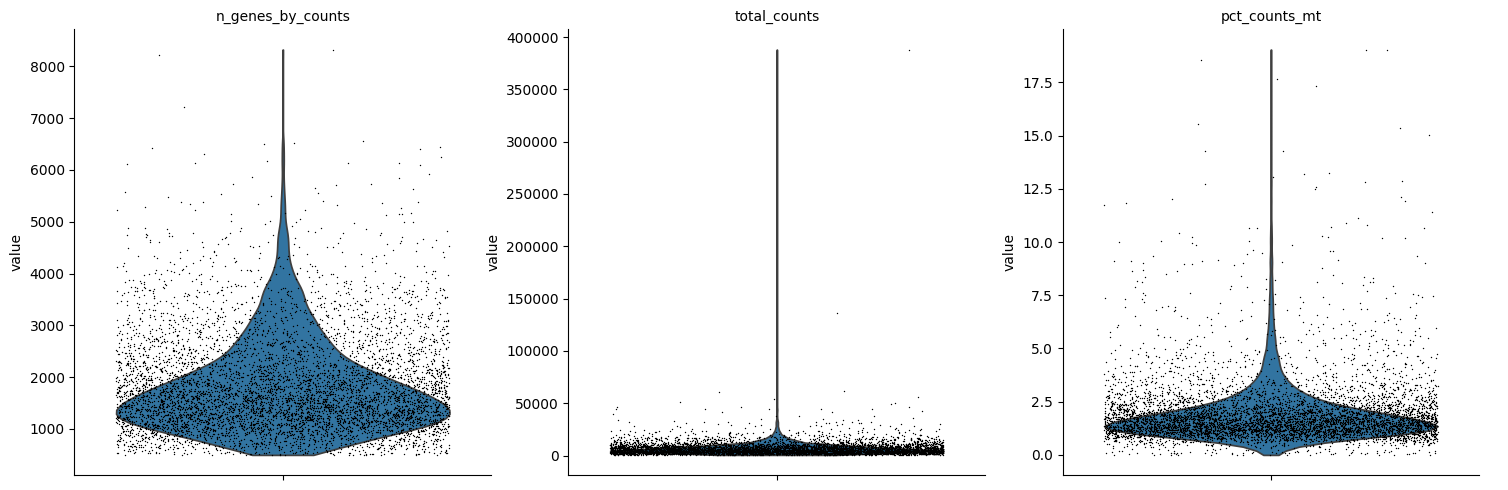

In [40]:
sc.pl.violin(nhp, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [41]:
nhp

AnnData object with n_obs × n_vars = 6619 × 18326
    obs: 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'donor', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'counts'

(0.0, 10.0)

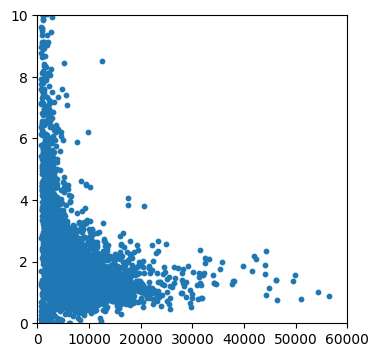

In [42]:
plt.figure(figsize=(4,4))
# sc.pl.scatter(nhp, x='total_counts', y='pct_counts_mt')
# sc.pl.scatter(nhp, x='total_counts', y='n_genes_by_counts')
plt.scatter(nhp.obs['total_counts'],nhp.obs['pct_counts_mt'],s=10)
plt.xlim(0,60000)
plt.ylim(0,10)


In [43]:
nhp = nhp[nhp.obs.total_counts < 27000, :]
nhp = nhp[nhp.obs.pct_counts_mt < 3.5, :]

In [44]:
rna=nhp.copy()

In [45]:
sc.pp.normalize_total(rna)
sc.pp.log1p(rna)

In [46]:
rna

AnnData object with n_obs × n_vars = 6012 × 18326
    obs: 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'donor', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'counts'

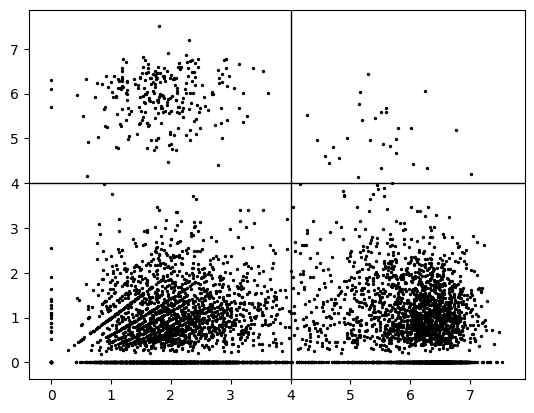

In [47]:

x="IGHM"
y='IGHA1 '
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),color='k',s=2)

plt.axvline(x=4,linewidth=1, c='k')
plt.axhline(y=4,linewidth=1, c='k')

In [48]:
#remove doublet 
m=4.3
a1=4
g2=3

rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHA1 ') > a1))] 
rna=rna[~((rna.obs_vector('IGHM') > 4.3) & (rna.obs_vector('IGHG2 ') > g2))] 
rna=rna[~((rna.obs_vector('IGHA1 ') > a1) & (rna.obs_vector('IGHG2 ') > g2))] 

In [49]:
#remove doublet 
k=6
l6_2=5
l6_1=5
l2=5

rna=rna[~((rna.obs_vector('IGKC') > k) & (rna.obs_vector('IGLC6 _2') > l6_2))] 
rna=rna[~((rna.obs_vector('IGKC') > k) & (rna.obs_vector('IGLC6 _1') > l6_1))] 
rna=rna[~((rna.obs_vector('IGKC') > k) & (rna.obs_vector('IGLC_2') > l2))] 
rna=rna[~((rna.obs_vector('IGLC6 _1') > 6) & (rna.obs_vector('IGLC6 _2') > 6.2))] 
rna=rna[~((rna.obs_vector('IGLC6 _1') > 6) & (rna.obs_vector('IGLC_2') > 6.2))] 





In [50]:
rna

View of AnnData object with n_obs × n_vars = 5568 × 18326
    obs: 'sample_batch', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'donor', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced', 'counts'

In [55]:
n633=rna[rna.obs.donor=='633']
n669=rna[rna.obs.donor=='669']

tc=pd.concat([nhp633_.var.total_counts,nhp669_.var.total_counts],axis=1)
tc.columns = ['633','669']
tc=tc.sort_values(by='633',ascending=False)

In [56]:
igc=tc[tc.index.str.startswith(('IGHM','IGHG','IGHA','IGHE','IGLC','IGKC'))]
igv=tc[tc.index.str.startswith(('IGKV','IGLV','IGHV',))]

(10000, 10000000)

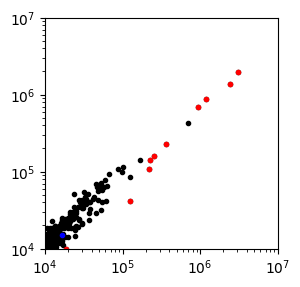

In [57]:
plt.figure(figsize=(3,3))



plt.scatter(tc['633'],tc['669'],color='k',s=9)
plt.scatter(igv['633'],igv['669'],color='blue',s=9)
plt.scatter(igc['633'],igc['669'],color='red',s=9)



plt.xscale('log')
plt.yscale('log')
plt.xlim(10000,10000000)
plt.ylim(10000,10000000)

In [29]:
rna_raw=rna.copy()

In [30]:
rna_raw.write('rna_raw.h5')